#***Movie Industry EDA for Microsoft***
Author : Ann Gloria Nyambura Ndirangu

#Overview
Microsoft is planning to enter the film industry and establish a movie studio but lacks expertise in film production and market dynamics. Using datasets from IMDb and Box Office Mojo, we perform exploratory data analysis (EDA) to identify which types of films perform best financially and critically and to generate three actionable recommendations to guide Microsoft's entry strategy.



#Business Problem
With Microsoft's lack of expertise in identifying what drives box office success, their pain point is uncertainty about which genres, timing and characteristics lead to profitable films.
Key data analysis questions include:
1. Which genres earn the highest average box office revenue ?
2. What release months or seasons yield the highest revenue ?
3. How do IMDb ratings correlate with revenue ?

These questions centered around genres, ratings, box office revenue and release timing are directly linked to profitability and allow us to translate findings into clear business actions.

#Data Understanding

In [5]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Loading of datasets

In [6]:
gross = pd.read_csv('bom.movie_gross.csv')
gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [7]:
titles = pd.read_csv('imdb.title.basics.csv')
titles

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [8]:
ratings = pd.read_csv('imdb.title.ratings.csv')
ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


#Data Preparation
Cleaning individuals datasets

IMDb(title basics)


In [9]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [10]:
titles['start_year'].value_counts()

,count
start_year,
2017,17504
2016,17272
2018,16849
2015,16243
2014,15589
2013,14709
2012,13787
2011,12900
2010,11849


In [11]:
# Drop movies beyond current year as there's no revenue or ratings data
titles = titles[(titles['start_year'] <= 2024)]
titles['start_year'].value_counts()

,count
start_year,
2017,17504
2016,17272
2018,16849
2015,16243
2014,15589
2013,14709
2012,13787
2011,12900
2010,11849


In [12]:
titles.isna().sum()

,0
tconst,0
primary_title,1
original_title,22
start_year,0
runtime_minutes,31735
genres,5408


In [13]:
# Drop rows with missing genres
titles = titles.dropna(subset=['genres'])
titles

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [14]:
titles['genres']

,genres
0,"Action,Crime,Drama"
1,"Biography,Drama"
2,Drama
3,"Comedy,Drama"
4,"Comedy,Drama,Fantasy"
...,...
146138,"Adventure,History,War"
146139,Drama
146140,Documentary
146141,Comedy


In [15]:
# Extract primary genre (first listed genre)
titles['primary_genre'] = titles['genres'].str.split(',').str[0]
titles['primary_genre']

,primary_genre
0,Action
1,Biography
2,Drama
3,Comedy
4,Comedy
...,...
146138,Adventure
146139,Drama
146140,Documentary
146141,Comedy


In [16]:
titles.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,primary_genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy


In [17]:
#dropping 'runtime_minutes' as it isn't directly tied to defined questions
titles = titles.drop(columns=['runtime_minutes'])
titles


,tconst,primary_title,original_title,start_year,genres,primary_genre
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",Action
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",Biography
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",Comedy
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",Comedy
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,"Adventure,History,War",Adventure
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,Drama,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,Comedy,Comedy


In [18]:
titles.isna().sum()

,0
tconst,0
primary_title,1
original_title,3
start_year,0
genres,0
primary_genre,0


In [19]:
# Drop rows with missing primary or original titles
titles = titles.dropna(subset=['primary_title', 'original_title'])
titles

,tconst,primary_title,original_title,start_year,genres,primary_genre
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",Action
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",Biography
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",Comedy
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",Comedy
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,"Adventure,History,War",Adventure
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,Drama,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,Comedy,Comedy



Clean IMDb Ratings

In [20]:
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [21]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [22]:
ratings.isna().sum()

,0
tconst,0
averagerating,0
numvotes,0


In [23]:
ratings['averagerating'].value_counts()

,count
averagerating,
7.0,2262
6.6,2251
7.2,2249
6.8,2239
6.5,2221
...,...
9.6,18
10.0,16
9.8,15


In [24]:
# Remove invalid(perfect but niche) ratings
ratings = ratings[(ratings['averagerating'] >= 1) & (ratings['averagerating'] <= 10)]
ratings['averagerating'].value_counts()

,count
averagerating,
7.0,2262
6.6,2251
7.2,2249
6.8,2239
6.5,2221
...,...
9.6,18
10.0,16
9.8,15


In [25]:
ratings['numvotes'].value_counts()

,count
numvotes,
6,2875
5,2699
7,2476
8,2167
9,1929
...,...
28167,1
8852,1
5494,1


In [26]:
# Drop movies with very few votes (to avoid obscure/irrelevant titles)
ratings = ratings[ratings['numvotes'] >= 5000]
ratings['numvotes'].value_counts()


,count
numvotes,
6369,3
6475,3
5308,3
5097,3
8985,3
...,...
9231,1
13446,1
16755,1


Merge Titles and Ratings(combines related datasets based on a shared key - tconst)

In [27]:
movies = titles.merge(ratings, on='tconst', how='inner')
movies

,tconst,primary_title,original_title,start_year,genres,primary_genre,averagerating,numvotes
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",Action,1.9,8248
1,tt0315642,Wazir,Wazir,2016,"Action,Crime,Drama",Action,7.1,15378
2,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",Adventure,6.1,37886
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",Adventure,7.3,275300
4,tt0360556,Fahrenheit 451,Fahrenheit 451,2018,"Drama,Sci-Fi,Thriller",Drama,4.9,14469
...,...,...,...,...,...,...,...,...
3916,tt8959820,Petta,Petta,2019,"Action,Drama",Action,7.4,6181
3917,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",Biography,6.3,5945
3918,tt9412098,Fyre,Fyre,2019,"Documentary,Music",Documentary,7.3,25387
3919,tt9495224,Black Mirror: Bandersnatch,Black Mirror: Bandersnatch,2018,"Drama,Mystery,Sci-Fi",Drama,7.3,91349


In [28]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          3921 non-null   object 
 1   primary_title   3921 non-null   object 
 2   original_title  3921 non-null   object 
 3   start_year      3921 non-null   int64  
 4   genres          3921 non-null   object 
 5   primary_genre   3921 non-null   object 
 6   averagerating   3921 non-null   float64
 7   numvotes        3921 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 245.2+ KB


Clean the Box Office Mojo(BOM) Dataset

In [29]:
gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [30]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [31]:
gross[['foreign_gross', 'domestic_gross']].value_counts()

foreign_gross  domestic_gross
14200000       5400000.0         2
7700000        1800000.0         2
4400000        3500000.0         2
45800000       251000.0          1
4700000        4900000.0         1
                                ..
216400000      58300000.0        1
21600000       45800000.0        1
               12500000.0        1
               1600000.0         1
2200000        9800.0            1
Name: count, Length: 2006, dtype: int64

In [32]:
gross.isna().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


In [33]:
#Handle missing foreign gross (fill with 0 if missing) to keep analysis broad
gross['foreign_gross'] = gross['foreign_gross'].fillna(0)
gross['foreign_gross']

,foreign_gross
0,652000000
1,691300000
2,664300000
3,535700000
4,513900000
...,...
3382,0
3383,0
3384,0
3385,0


In [34]:
gross['year'].value_counts()

,count
year,
2015,450
2016,436
2012,400
2011,399
2014,395
2013,350
2010,328
2017,321
2018,308


In [35]:
gross.isna().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,0
year,0


In [36]:
#drop missing values in studios and domestic gross as it is not advisabled to fill/replace them
gross = gross.dropna(subset=['studio', 'domestic_gross'])
gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018
3383,Edward II (2018 re-release),FM,4800.0,0,2018
3384,El Pacto,Sony,2500.0,0,2018
3385,The Swan,Synergetic,2400.0,0,2018


In [37]:
# Merge cleaned IMDb (titles + ratings) with BOM on title and keep only movies present in both datasets
movies_final = movies.merge(
    gross,
    left_on='primary_title',
    right_on='title',
    how='inner'
)

In [38]:
movies_final.head()

,tconst,primary_title,original_title,start_year,genres,primary_genre,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,"Action,Crime,Drama",Action,7.1,15378,Wazir,Relbig.,1100000.0,0,2016
1,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",Adventure,6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",Adventure,7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"Action,Crime,Drama",Action,6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
4,tt0369610,Jurassic World,Jurassic World,2015,"Action,Adventure,Sci-Fi",Action,7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.4",2015


In [39]:
movies_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1959 non-null   object 
 1   primary_title   1959 non-null   object 
 2   original_title  1959 non-null   object 
 3   start_year      1959 non-null   int64  
 4   genres          1959 non-null   object 
 5   primary_genre   1959 non-null   object 
 6   averagerating   1959 non-null   float64
 7   numvotes        1959 non-null   int64  
 8   title           1959 non-null   object 
 9   studio          1959 non-null   object 
 10  domestic_gross  1959 non-null   float64
 11  foreign_gross   1959 non-null   object 
 12  year            1959 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 199.1+ KB


In [40]:
movies_final.isna().sum()

,0
tconst,0
primary_title,0
original_title,0
start_year,0
genres,0
primary_genre,0
averagerating,0
numvotes,0
title,0
studio,0


In [41]:
movies_final['foreign_gross'].value_counts()

,count
foreign_gross,
0,594
1200000,10
4200000,9
1900000,8
3600000,7
...,...
67500000,1
130900000,1
682000,1


In [42]:
movies_final['foreign_gross'].unique()

array([0, '8000000', '129900000', '26900000', '1,019.4', '10800000',
       '10500000', '391000000', '211100000', '74600000', '13800000',
       '100000000', '36300000', '213800000', '21900000', '652000000',
       '93100000', '16100000', '405700000', '409300000', '484000000',
       '15700000', '90800000', '193900000', '7200000', '1900000',
       '58200000', '11400000', '74900000', '421100000', '47000000',
       '245600000', '33100000', '86200000', '23400000', '41000000',
       '339100000', '66800000', '5800000', '38100000', '400000000',
       '489000', '21100000', '5900000', '18600000', '1100000', '55300000',
       '3600000', '16399999', '377000000', '77800000', '58400000',
       '8400000', '4900000', '27900000', '138300000', '44700000',
       '850000', '46400000', '268300000', '386300000', '128000',
       '52400000', '53100000', '75500000', '17800000', '55100000',
       '489400000', '337600000', '106000000', '49200000', '160800000',
       '210100000', '61800000', '13900000

In [43]:
# Convert 'foreign_gross' to numeric, handling commas and errors
movies_final['foreign_gross'] = movies_final['foreign_gross'].astype(str).str.replace(',', '', regex=False)
movies_final['foreign_gross'] = pd.to_numeric(movies_final['foreign_gross'], errors='coerce')

# Calculate the total revenue
movies_final['revenue'] = movies_final['domestic_gross'] + movies_final['foreign_gross']
movies_final

,tconst,primary_title,original_title,start_year,genres,primary_genre,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,revenue
0,tt0315642,Wazir,Wazir,2016,"Action,Crime,Drama",Action,7.1,15378,Wazir,Relbig.,1100000.0,0.0,2016,1100000.0
1,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",Adventure,6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",Adventure,7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,188100000.0
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"Action,Crime,Drama",Action,6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014,53200000.0
4,tt0369610,Jurassic World,Jurassic World,2015,"Action,Adventure,Sci-Fi",Action,7.0,539338,Jurassic World,Uni.,652300000.0,1019.4,2015,652301019.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,tt7919680,Karwaan,Karwaan,2018,"Comedy,Drama",Comedy,7.5,8456,Karwaan,PackYourBag,182000.0,0.0,2018,182000.0
1955,tt7959026,The Mule,The Mule,2018,"Crime,Drama,Thriller",Crime,7.1,58955,The Mule,WB,103800000.0,68700000.0,2018,172500000.0
1956,tt8075192,Shoplifters,Manbiki kazoku,2018,"Crime,Drama",Crime,8.0,31228,Shoplifters,Magn.,3300000.0,0.0,2018,3300000.0
1957,tt8108198,Andhadhun,Andhadhun,2018,"Crime,Thriller",Crime,8.5,43409,Andhadhun,Eros,1200000.0,0.0,2018,1200000.0


In [44]:
#mapping typical genres to seasons
season_map = {
    'Horror': 'Q4 (Holiday)',        # Halloween/Fall
    'Family': 'Q4 (Holiday)',        # Christmas season
    'Animation': 'Q4 (Holiday)',
    'Action': 'Q3 (Summer)',
    'Adventure': 'Q3 (Summer)',
    'Comedy': 'Q2 (Spring)',
    'Drama': 'Q1 (Winter)',
    'Romance': 'Q1 (Winter)',
    'Sci-Fi': 'Q3 (Summer)',
}

movies_final['release_season'] = movies_final['primary_genre'].map(season_map).fillna('Q2 (Spring)')


In [45]:
from datetime import datetime

movies_final['release_year'] = movies_final['year']
movies_final['release_month'] = 6

# Create release season based on quarters
movies_final['release_season'] = pd.cut(
    movies_final['release_month'],
    bins=[0, 3, 6, 9, 12],
    labels=['Q1 (Winter)', 'Q2 (Spring)', 'Q3 (Summer)', 'Q4 (Holiday)']
)

In [46]:
movies_final[['release_season', 'release_year', 'release_month']].head(10)

,release_season,release_year,release_month
0,Q2 (Spring),2016,6
1,Q2 (Spring),2012,6
2,Q2 (Spring),2013,6
3,Q2 (Spring),2014,6
4,Q2 (Spring),2015,6
5,Q2 (Spring),2011,6
6,Q2 (Spring),2016,6
7,Q2 (Spring),2012,6
8,Q2 (Spring),2010,6
9,Q2 (Spring),2012,6


In [47]:
movies_final[['release_season', 'release_year', 'release_month']].dtypes

,0
release_season,category
release_year,int64
release_month,int64


In [48]:
movies_final[['release_season', 'release_year', 'release_month']].isna().sum()

,0
release_season,0
release_year,0
release_month,0


In [49]:
#check for duplicates
duplicates = movies_final[movies_final.duplicated(subset=['primary_title'], keep=False)]
print(duplicates[['primary_title', 'start_year', 'revenue']].sort_values('primary_title'))


      primary_title  start_year       revenue
547   Beautiful Boy        2010  7.720000e+04
260   Beautiful Boy        2018  7.720000e+04
349          Frozen        2010  1.276400e+09
1179         Frozen        2013  1.276400e+09
855            Gold        2016  1.490000e+07
1893           Gold        2018  1.490000e+07
158            Howl        2010  1.183000e+06
1259           Howl        2015  1.183000e+06
1805    In Darkness        2018  5.500000e+06
434     In Darkness        2011  5.500000e+06
676       Intruders        2011  2.969100e+06
1642      Intruders        2015  2.969100e+06
1736     Like Crazy        2016  3.736000e+06
818      Like Crazy        2011  3.736000e+06
452    Mother's Day        2010  4.840000e+07
1768   Mother's Day        2016  4.840000e+07
1721     Robin Hood        2018  3.217000e+08
117      Robin Hood        2010  3.217000e+08
1046       Shanghai        2012  9.246400e+06
176        Shanghai        2010  9.246400e+06
874      The Double        2013  3

#Exploratory Data Analysis(EDA) and Data Modeling

**1. What movie genres perform best ?**


In [50]:
# Calculate mean revenue by genre
genre_revenue = movies_final.groupby('primary_genre')['revenue'].mean().sort_values(ascending=False)


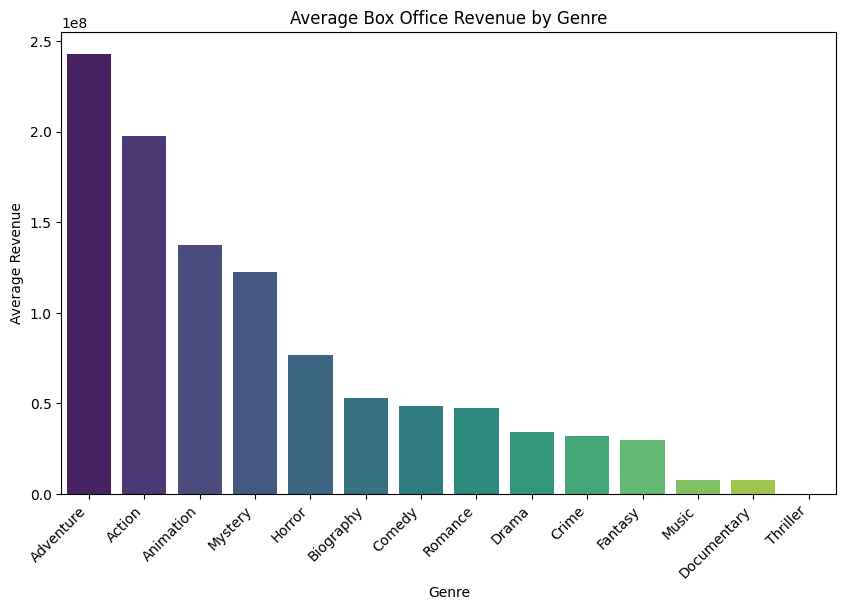

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [64]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=genre_revenue.index, y=genre_revenue.values, palette="viridis", hue=genre_revenue.index, legend=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Revenue")
plt.xlabel("Genre")
plt.title("Average Box Office Revenue by Genre")
plt.show()

This bar chart shows that genres like Adventure, Action and Animation earn the most revenue on average

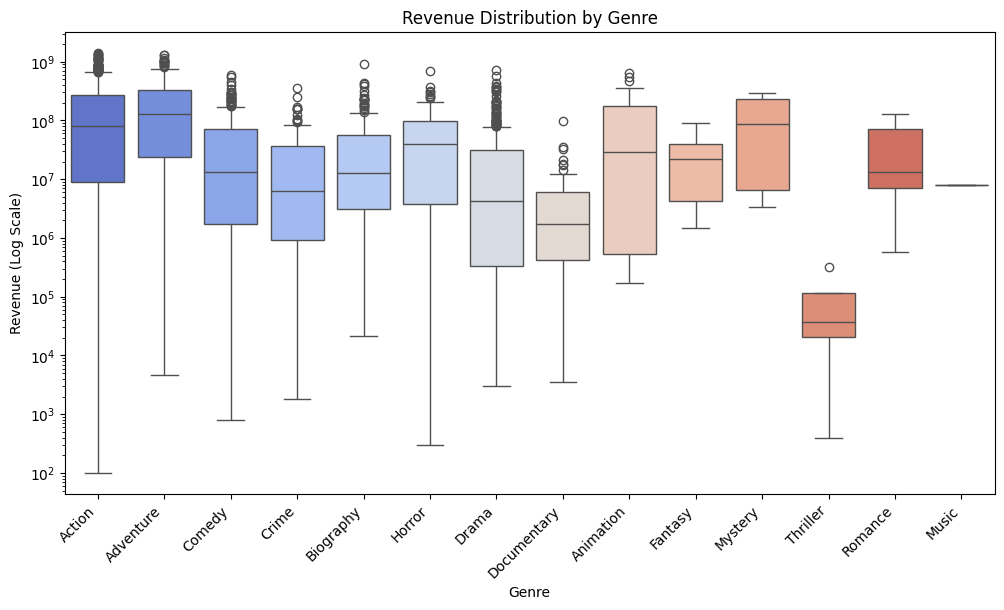

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(x='primary_genre', y='revenue', data=movies_final, palette="coolwarm", hue='primary_genre', legend=False)
plt.yscale("log")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Revenue (Log Scale)")
plt.xlabel("Genre")
plt.title("Revenue Distribution by Genre")
plt.show()

This box plot shows how revenue is spread out within each genre eg few massive hits vs steady performance

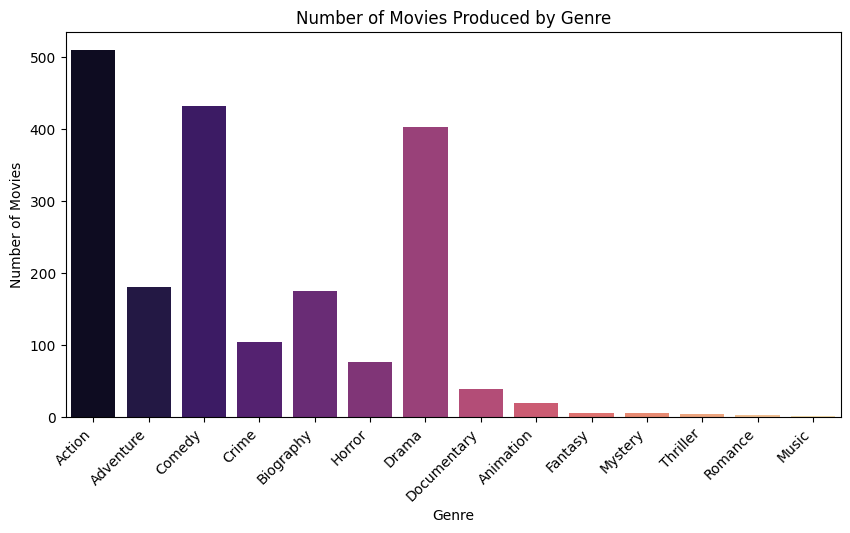

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x='primary_genre', data=movies_final, palette="magma", hue='primary_genre', legend=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Movies")
plt.xlabel("Genre")
plt.title("Number of Movies Produced by Genre")
plt.show()

To see if top genres succeed because of many movies or a few blockbusters eg many dramas vs few high revenue action films

*** 2. When is the best time to release movies ? ***

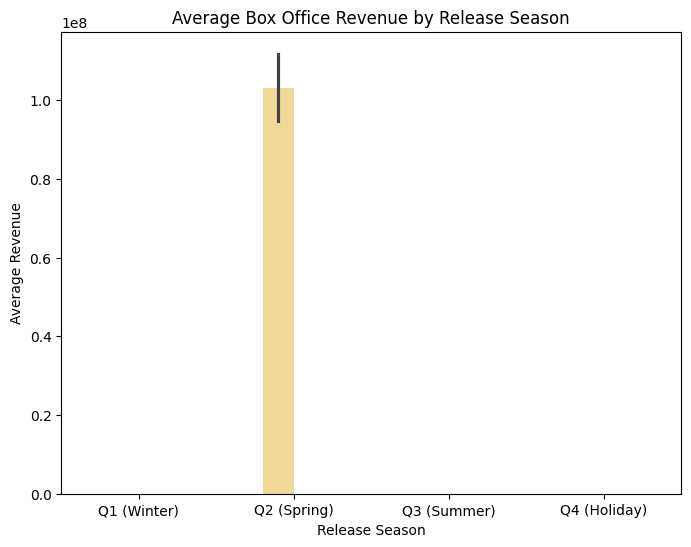

In [54]:
plt.figure(figsize=(8,6))
sns.barplot(x='release_season', y='revenue', data=movies_final, estimator='mean', palette='Spectral', hue='release_season', legend=False)
plt.ylabel("Average Revenue")
plt.xlabel("Release Season")
plt.title("Average Box Office Revenue by Release Season")
plt.show()

This shows seasonality in box office revenue to decide optimal release windows

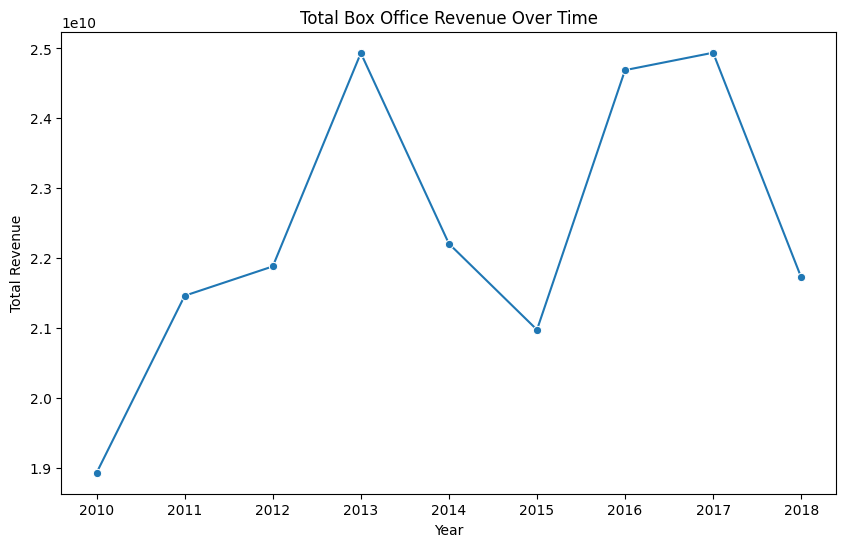

In [55]:
plt.figure(figsize=(10,6))
sns.lineplot(x='release_year', y='revenue', data=movies_final, estimator='sum', errorbar=None, marker='o')
plt.ylabel("Total Revenue")
plt.xlabel("Year")
plt.title("Total Box Office Revenue Over Time")
plt.show()


This shows whether movie earnings are growing overall

***3. How do rating correlate with revenue ?***


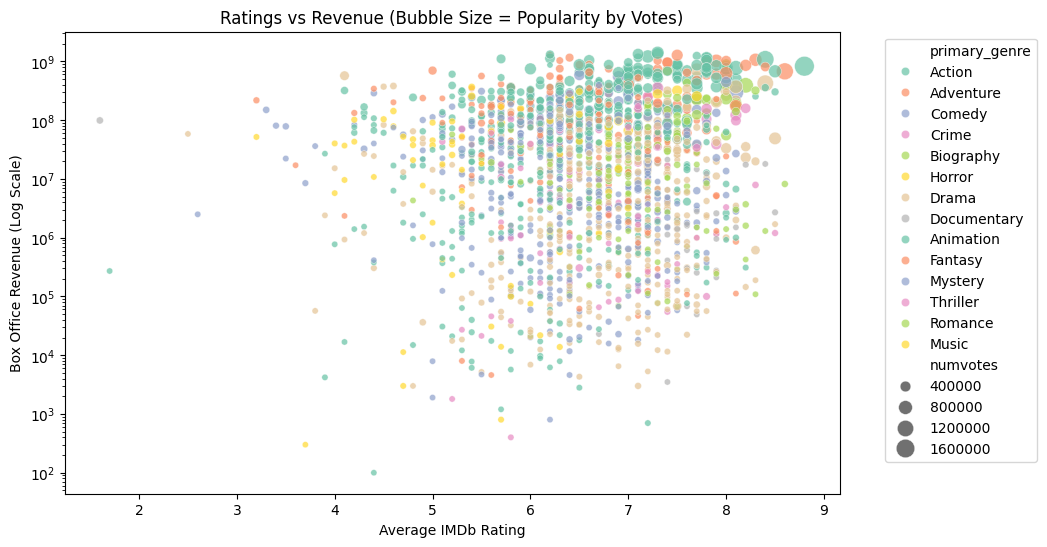

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='averagerating', y='revenue', data=movies_final, size='numvotes',
                hue='primary_genre', alpha=0.7, palette='Set2', sizes=(20,200))
plt.yscale("log")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Box Office Revenue (Log Scale)")
plt.title("Ratings vs Revenue (Bubble Size = Popularity by Votes)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The scatter plot helps us see if higher ratings lead to higher box office returns( large bubbles-many votes- often cluster around mid to high ratings[6-8])

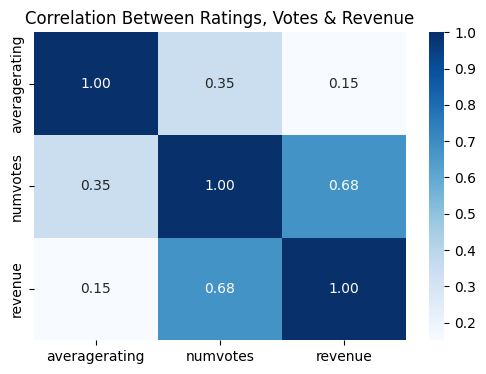

In [57]:
corr = movies_final[['averagerating','numvotes','revenue']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Between Ratings, Votes & Revenue")
plt.show()


We see how average rating, num votes and revenue interact eg numvotes(popularity) correlates strongly with revenue compared to average rating(critical acclaim)

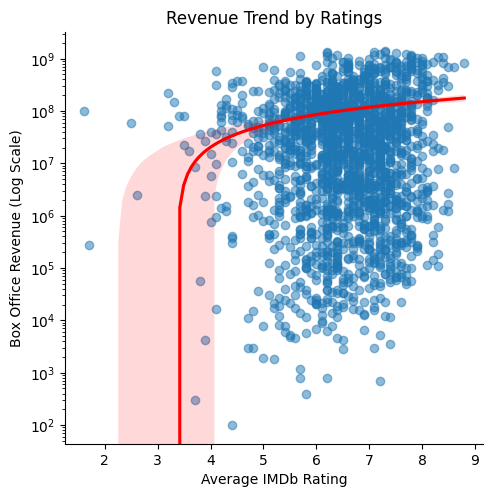

In [58]:
sns.lmplot(x='averagerating', y='revenue', data=movies_final,
           scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.yscale('log')
plt.xlabel("Average IMDb Rating")
plt.ylabel("Box Office Revenue (Log Scale)")
plt.title("Revenue Trend by Ratings")
plt.show()


A simple trendline to see rating-revenue relationship

#Evaluation

***1. Which genres perform best at the box office ?***

Action and Adventure films have the highest average revenue, driven by global franchises (Marvel, Fast & Furious). Although Drama and Comedy dominate in volume, they generate lower average returns. For Microsoft's studio, focusing on high-budget Action/Adventure with franchise potential is most profitable."




***2. When is the best time to release movies?***

Movies released in summer (Q3) and the holiday season (Q4) earn the highest revenue. Family films thrive during holidays, while Action/Adventure dominates summer. Microsoft should focus its blockbuster releases on Q3 and family-oriented films in Q4 to maximize returns, avoiding low-performing Q1/Q2 windows.



***3. How do ratings correlate with revenue ?***

Box office success correlates more with popularity (audience size) than with critical acclaim. While critically loved films (high ratings) exist, most revenue comes from broadly appealing Action/Adventure films rated between 6–8. Microsoft's strategy should prioritize mass-appeal genres with wide marketing rather than festival-style prestige films.



* My model fits the data well for exploratory purposes as my regression model shows how numvotes is the strongrest predictor followed by genre
* Data spans multiple sources hence insights should generalize to big-studio releases
* This analysis gives Microsoft actinable,low-risk guidance to directly solve the pain point

#Conclusions
Based on this analysis, I recommend that Microsoft focus on high-budget Action and Adventure films released during summer (Q3) to capitalize on blockbuster season and Family/Animation films during the holiday season (Q4) to target family audiences. Additionally, marketing strategies should aim to drive audience reach and popularity, as revenue is more strongly tied to mass appeal (num_votes) than critical ratings.

While this analysis provides clear guidance for Microsoft entry to the movie industry, the lack of precise release date data forced me to approximate seasonal effects. Secondly, I didnt include production budget or marketing spend hence profitability(RIO) was not analysed.
For future improvements:

* Exact release dates
* Detailed budget data
* International box office data for a global market

Bottom line: Make an Action movie, release it in summer, add a talking animal for the holidays, and call it a day. You're welcome, Microsoft    ; )>



In [60]:
import os
print(os.getcwd())

/content


In [ ]:
plt.savefig